<h2>Склейка изображений</h2>

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [6]:
def image_merging (A, B):
    G = A.copy()
    gpA = [G]
    for i in range(5):
        G = cv2.pyrDown(G)
        gpA.append(G)

    G = B.copy()
    gpB = [G]
    for i in range(5):
        G = cv2.pyrDown(G)
        gpB.append(G)

    lpA = [gpA[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpA[i])
        L = cv2.subtract(gpA[i-1],GE)
        lpA.append(L)

    lpB = [gpB[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpB[i])
        L = cv2.subtract(gpB[i-1],GE)
        lpB.append(L)

    LS = []
    for la,lb in zip(lpA,lpB):
        rows,cols,dpt = la.shape
        ls = np.hstack((la[:, 0: int(cols/2)], lb[:, int(cols/2) :]))
        LS.append(ls)

    ls_ = LS[0]
    for i in range(1,6):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, LS[i])

    real = np.hstack((A[:, :int(cols/2)],B[:, int(cols/2):]))
    return real, ls_

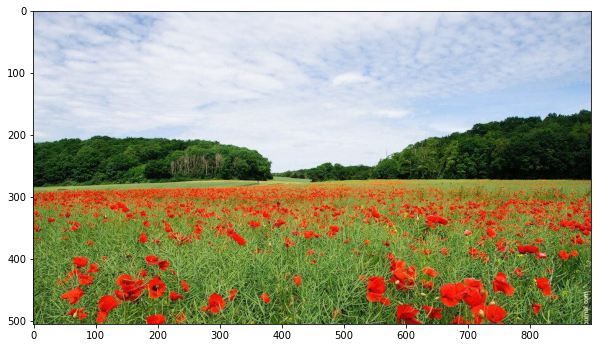

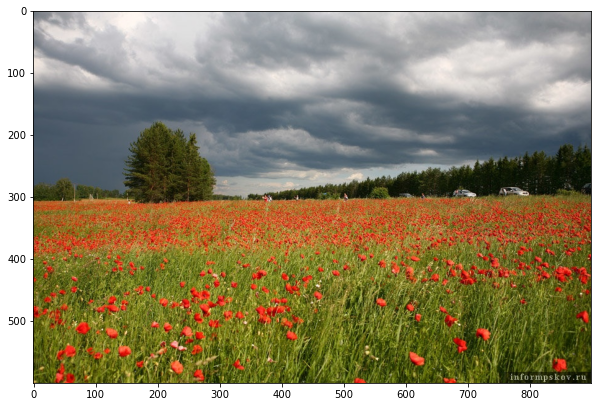

In [10]:
image1 = cv2.imread('1.jpg', 3)
A = cv2.resize(image1, (448, 448), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

image2 = cv2.imread('2.jpg', 3)
B = cv2.resize(image2, (448, 448), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

direct_merged, lapl_merge = image_merging(A, B)


Text(0.5, 1.0, 'Прямое слияние')

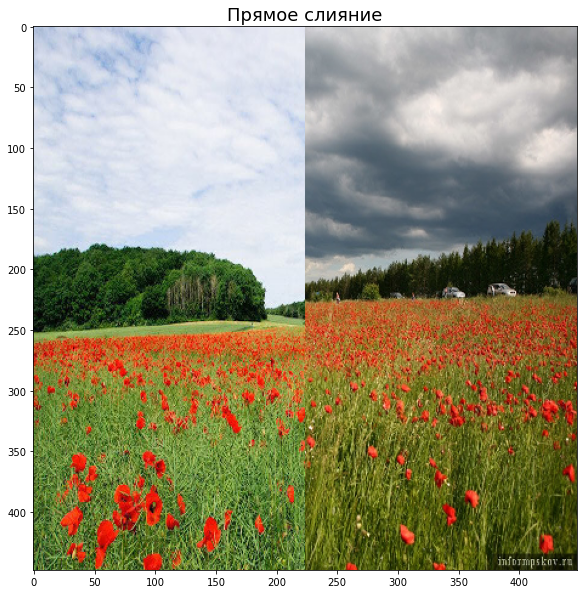

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(direct_merged, cv2.COLOR_BGR2RGB))
plt.title('Прямое слияние', fontsize=18)

Text(0.5, 1.0, 'Слияние с помощью пирамид')

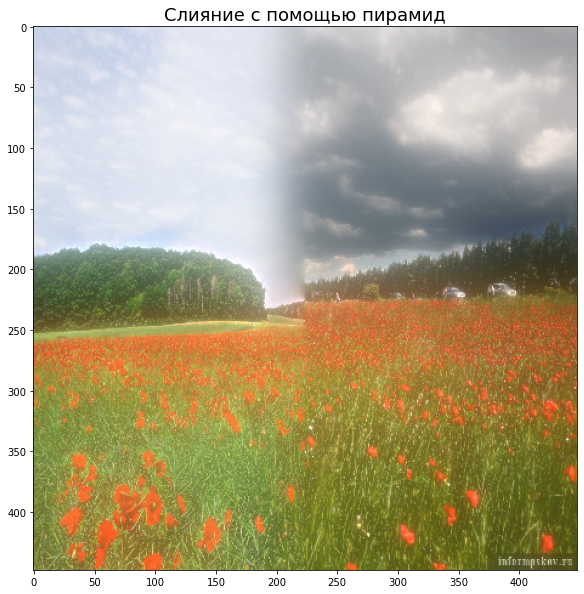

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(lapl_merge, cv2.COLOR_BGR2RGB))
plt.title('Слияние с помощью пирамид', fontsize=18)